# Hurricane Distribution

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import xarray as xr
from sithom.plot import plot_defaults
from sithom.xr import plot_units
from src.constants import IBTRACS_NC

plot_defaults()

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [3]:
from src.data_loading.ibtracs import gom_tcs

In [4]:
gtcs = gom_tcs()

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [65]:
var_list = ["storm_speed", "storm_dir", "usa_pres", "usa_rmw", "usa_wind", "usa_sshs"]

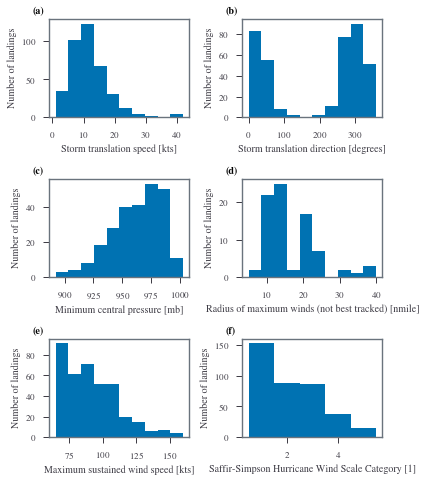

In [98]:
from typing import Optional, List
import matplotlib
from sithom.plot import label_subplots, set_dim
from sithom.misc import in_notebook


def var_label(ds: xr.Dataset, var: str) -> str:
    return ds[var].attrs["long_name"] + " [" + ds[var].attrs["units"] + "]"


def plain_hist(
    dist: np.ndarray,
    ds: xr.Dataset,
    var: str,
    ax: Optional[matplotlib.axes.Axes] = None,
) -> None:
    if ax is None:
        ax = plt.subplot(projection="polar")
    if var == "usa_sshs":
        kwargs = dict(bins=[0.5 + x for x in range(6)])
    else:
        kwargs = dict()
    ax.hist(dist, **kwargs)
    ax.set_ylabel("Number of landings")
    ax.set_xlabel(var_label(ds, var))


def polar_hist(
    dist: np.ndarray,
    ds: xr.Dataset,
    var: str,
    ax: Optional[matplotlib.axes.Axes] = None,
) -> None:
    """
    Plot polar histogram.

    Will only work for single plot,
    as uses plt.hist to create histogram bins.

    Args:
        dist (np.ndarray): Input array [Degrees].
        ds (xr.Dataset): Dataset.
        var (str): variable.
        ax (Optional[matplotlib.axes.Axes]): axes.
    """
    output = plt.hist(dist)
    points = output[0]
    rads = output[1] / 360 * 2 * np.pi
    plt.clf()
    if ax is None:
        ax = plt.subplot(projection="polar")
    ax.bar(
        rads[1:],
        points,
        width=2 * np.pi / len(points),
        bottom=0.0,
        alpha=0.5,
        edgecolor="black",
    )
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)


def individual_dist(
    ds: xr.Dataset, var: str, ax: Optional[matplotlib.axes.Axes] = None
) -> None:
    dist = landing_distribution(ds, var=var)
    if var == "x":  # "storm_dir":
        polar_hist(dist, ds, var, ax=ax)
    else:
        plain_hist(dist, ds, var, ax=ax)
    if var == "usa_sshs":
        kwargs = dict(bins=[0.5 + x for x in range(6)])


def multi_dist(ds: xr.Dataset, var_list: List[List[str]]) -> None:
    var_array = np.array(var_list)
    shape = var_array.shape
    fig, axs = plt.subplots(*shape)
    set_dim(fig, fraction_of_line_width=1, ratio=(5**0.5 - 1) / 2 * 2)

    for i in range(shape[0]):
        for j in range(shape[1]):
            individual_dist(ds, var_array[i, j], ax=axs[i, j])
    if len(axs.ravel()) > 1:
        label_subplots(axs.ravel(), override="outside")


def make_plot():
    gtcs = gom_tcs()
    multi_dist(
        gtcs,
        [
            ["storm_speed", "storm_dir"],
            ["usa_pres", "usa_rmw"],
            ["usa_wind", "usa_sshs"],
        ],
    )
    if in_notebook():
        plt.show()
    else:
        plt.savefig("gc_landing_distributions.png")


make_plot()

In [96]:
from sithom.plot import label_subplots, set_dim

?set_dim

In [88]:
?plt.subplots

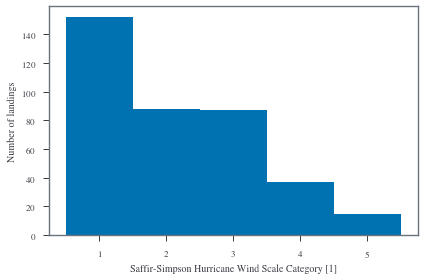

In [83]:
individual_dist(gtcs, "usa_sshs")

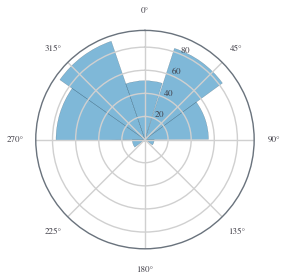

In [85]:
individual_dist(gtcs, "storm_dir")

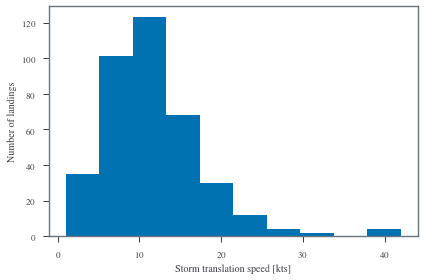

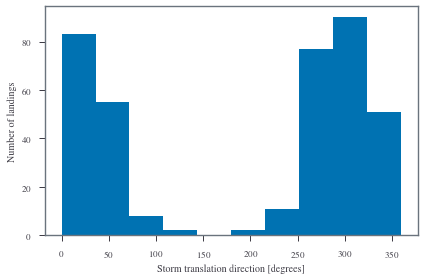

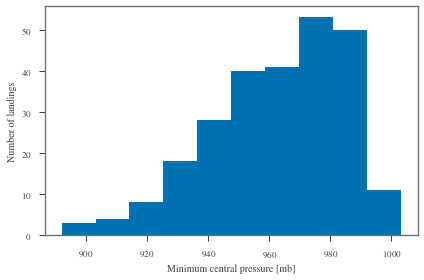

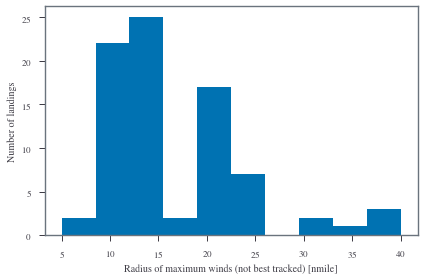

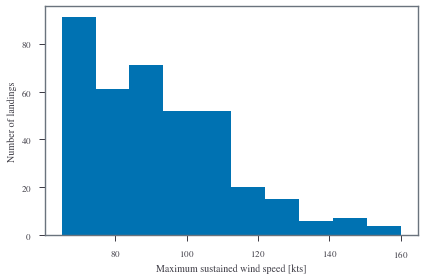

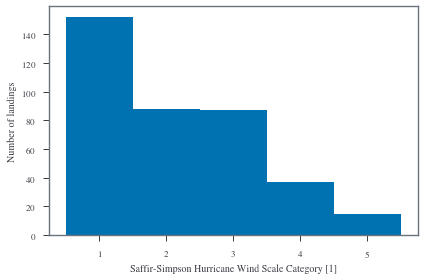

In [80]:
for var in var_list:
    individual_dist(gtcs, var)

In [78]:
?plt.hist

In [61]:
gtcs

<xarray.Dataset>
Dimensions:           (storm: 465, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 47.0 101.0 37.0 18.0 ... 29.0 70.0 63.0
    sid               (storm) |S13 b'1990216N13281' ... b'1903252N21288'
    season            (storm) float32 1.99e+03 1.935e+03 ... 2.008e+03 1.903e+03
    number            (storm) int16 60 46 5 44 10 53 39 ... 41 61 54 75 58 88 42
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'CS' b'CS' b'CS' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [56]:
dist = landing_distribution(gtcs, var="usa_pres")

In [57]:
dist

array([ 994.,  980.,  892.,  965., 1005.,  973.,  961., 1003., 1002.,
       1001.,  985.,  987., 1004., 1002.,  995.,  964.,  995.,  946.,
       1006.,  934., 1006., 1005., 1007.,  979., 1004.,  989.,  991.,
        976., 1002.,  953., 1004., 1000.,  977.,  979.,  980., 1002.,
       1000.,  998.,  993., 1007.,  995., 1005.,  986., 1006., 1004.,
        923.,  931.,  926.,  922.,  956.,  996., 1003.,  993.,  956.,
        952.,  947.,  945.,  930.,  942.,  958.,  959.,  962.,  980.,
       1004.,  995.,  977.,  973.,  989.,  985., 1008.,  991.,  997.,
        967.,  966.,  972.,  952.,  957., 1001.,  983.,  992., 1005.,
       1000.,  970., 1006., 1003.,  972.,  955.,  931., 1001., 1008.,
        991.,  993., 1000., 1007.,  982., 1004., 1002., 1008., 1000.,
       1000.,  999.,  996., 1011.,  999., 1005.,  950.,  991.,  991.,
        999.,  984.,  973., 1002.,  988.,  997., 1006.,  959.,  942.,
        958.,  981.,  967.,  997.,  973., 1001., 1009.,  940.,  944.,
        999.,  989.,

Text(0.5, 0, 'Pressure [mb]')

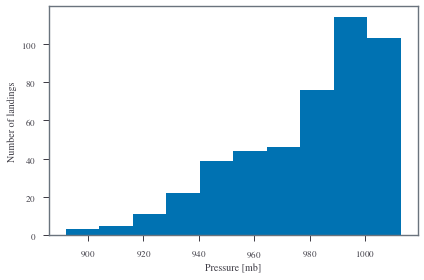

In [58]:
import matplotlib.pyplot as plt

plt.hist(dist)
plt.ylabel("Number of landings")
plt.xlabel("Pressure [mb]")

In [41]:
from src.data_loading.ibtracs import (
    katrina,
    landing_distribution,
    holland_b_landing_distribution,
)
from src.preprocessing.sel import mid_katrina

In [29]:
landing_distribution(katrina())

[984.0, 920.0, 928.0]

In [55]:
holland_b_landing_distribution(katrina()).tolist()

[175.00549603625592, 140.7033819399621, 143.1886980704015]

In [15]:
kat_ds = katrina()

In [59]:
kat_ds

<xarray.Dataset>
Dimensions:           (storm: 1, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] 2005-08-23T18:00:00.0...
    lat               (storm, date_time) float32 23.1 23.25 23.4 ... nan nan nan
    lon               (storm, date_time) float32 -75.1 -75.4 -75.7 ... nan nan
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 64.0
    sid               (storm) |S13 b'2005236N23285'
    season            (storm) float32 2.005e+03
    number            (storm) int16 61
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 nan nan nan nan ... nan nan nan
    reunion_gust_per  (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_seahgt        (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_searad        (storm, date_time, quadrant) float32 nan nan ... nan nan
    storm_speed       (storm, date_time) float32 6.0 6.0 6.0 6.0 ... nan nan nan
    storm_dir         (storm, date_time) float32 298.0 299.0 302.0 ... nan nan
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [26]:
kat_ds.storm

<xarray.DataArray 'storm' (storm: 1)>
array([0])
Dimensions without coordinates: storm

Text(0.5, 0, 'Holland B parameter')

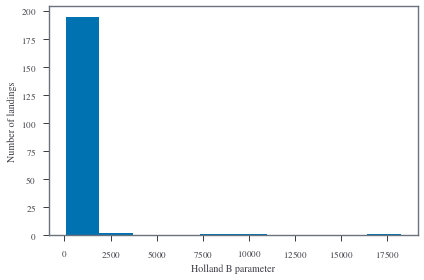

In [44]:
dist = holland_b_landing_distribution(gtcs)
plt.hist(dist)
plt.ylabel("Number of landings")
plt.xlabel("Holland B parameter")

Text(0.5, 0, 'Holland B parameter')

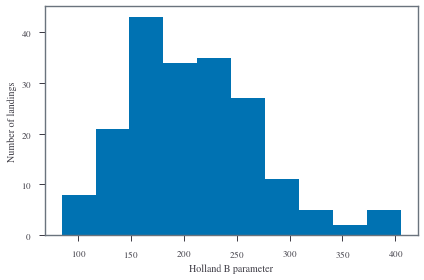

In [53]:
plt.hist(np.array(dist)[np.array(dist) < 800])
plt.ylabel("Number of landings")
plt.xlabel("Holland B parameter")

In [43]:
holland_b_landing_distribution(kat_ds)

[175.00549603625592, 140.7033819399621, 143.1886980704015]

In [23]:
kat_landings_ds = kat_ds.isel(
    date_time=kat_ds["date_time"][(kat_ds["usa_record"].values == b"L").ravel()]
)

In [24]:
kat_landings_ds

<xarray.Dataset>
Dimensions:           (storm: 1, date_time: 3, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] 2005-08-25T22:30:00.0...
    lat               (storm, date_time) float32 26.0 29.3 30.2
    lon               (storm, date_time) float32 -80.1 -89.6 -89.6
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 64.0
    sid               (storm) |S13 b'2005236N23285'
    season            (storm) float32 2.005e+03
    number            (storm) int16 61
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA'
    subbasin          (storm, date_time) |S2 b'NA' b'GM' b'GM'
    ...                ...
    reunion_gust      (storm, date_time) float32 nan nan nan
    reunion_gust_per  (storm, date_time) float32 nan nan nan
    usa_seahgt        (storm, date_time) float32 nan nan nan
    usa_searad        (storm, date_time, quadrant) float32 nan nan ... nan nan
    storm_speed       (storm, date_time) float32 8.0 14.0 15.0
    storm_dir         (storm, date_time) float32 241.0 2.0 0.0
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [14]:
mid_katrina(katrina())

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/core/indexing.py", line 73, in group_indexers_by_index
    index = xindexes[key]
KeyError: 'time'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/simon/new-orleans/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_59614/1725067096.py", line 1, in <cell line: 1>
    mid_katrina(katrina())
  File "/Users/simon/new-orleans/src/preprocessing/sel.py", line 38, in mid_katrina
    return xr_obj.sel(
  File "/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/core/dataset.py", line 2501, in sel
    pos_indexers, new_indexes = remap_label_indexers(
  File "/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/core/coordinates.py", line 421

In [5]:
gtcs

<xarray.Dataset>
Dimensions:           (storm: 465, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'CS' b'CS' b'CS' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [6]:
gtcs

<xarray.Dataset>
Dimensions:           (storm: 465, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 47.0 101.0 37.0 18.0 ... 29.0 70.0 63.0
    sid               (storm) |S13 b'1990216N13281' ... b'1903252N21288'
    season            (storm) float32 1.99e+03 1.935e+03 ... 2.008e+03 1.903e+03
    number            (storm) int16 60 46 5 44 10 53 39 ... 41 61 54 75 58 88 42
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'CS' b'CS' b'CS' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Occurance')

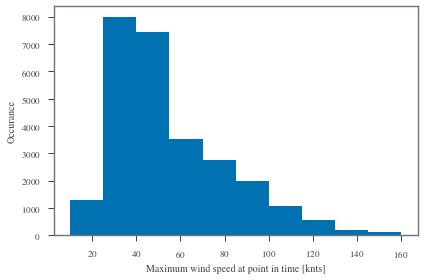

In [8]:
plt.hist(gtcs.usa_wind.values.ravel())
plt.xlabel("Maximum wind speed at point in time [knts]")
plt.ylabel("Occurance")

In [9]:
gtcs.usa_wind.values.shape

(465, 360)

Text(0, 0.5, 'Occurance')

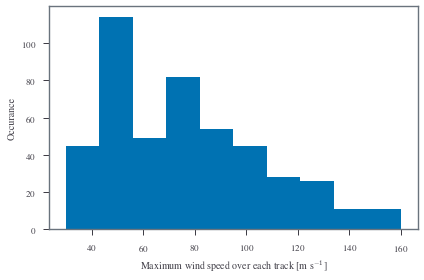

In [10]:
import numpy as np

plt.hist(np.nanmax(gtcs.usa_wind.values, axis=1))
plt.xlabel("Maximum wind speed over each track [m s$^{-1}$]")
plt.ylabel("Occurance")

Text(0, 0.5, 'Occurance')

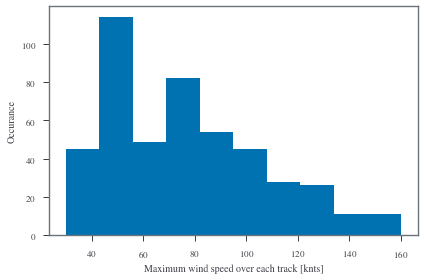

In [11]:
import numpy as np

plt.hist(np.nanmax(gtcs.usa_wind.values, axis=1))
plt.xlabel("Maximum wind speed over each track [knts]")
plt.ylabel("Occurance")

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_21279/2010469386.py:3: RuntimeWarning: All-NaN slice encountered
  plt.hist(np.nanmin(gtcs.usa_pres.values, axis=1))


Text(0, 0.5, 'Occurance')

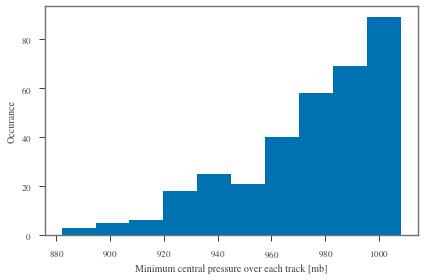

In [12]:
import numpy as np

plt.hist(np.nanmin(gtcs.usa_pres.values, axis=1))
plt.xlabel("Minimum central pressure over each track [mb]")
plt.ylabel("Occurance")

Text(0, 0.5, 'Occurance')

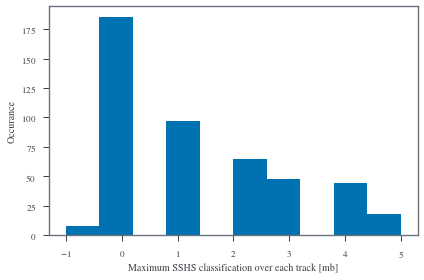

In [13]:
plt.hist(np.nanmax(gtcs.usa_sshs.values, axis=1))
plt.xlabel("Maximum SSHS classification over each track [mb]")
plt.ylabel("Occurance")

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_21279/1773748188.py:2: RuntimeWarning: All-NaN slice encountered
  np.nanmin(gtcs.usa_pres.values, axis=1),


Text(0.5, 0, 'Minimum Central Pressure over track [mb]')

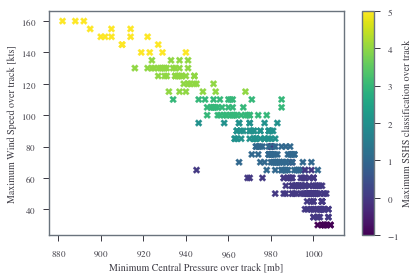

In [14]:
plt.scatter(
    np.nanmin(gtcs.usa_pres.values, axis=1),
    np.nanmax(gtcs.usa_wind.values, axis=1),
    c=np.nanmax(gtcs.usa_sshs.values, axis=1),
)
plt.colorbar(label="Maximum SSHS classification over track")
plt.ylabel("Maximum Wind Speed over track [kts]")
plt.xlabel("Minimum Central Pressure over track [mb]")

In [15]:
np.nanmax(gtcs.usa_sshs.values, axis=1).shape

(465,)

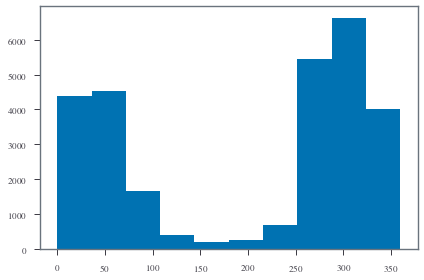

In [16]:
output = plt.hist(gtcs.storm_dir.values.ravel())

In [17]:
output = plt.hist(gtcs.storm_dir.values.ravel())
plt.clf()
points = output[0]
rads = output[1] / 2 / np.pi

<Figure size 432x288 with 0 Axes>

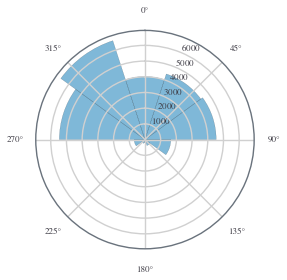

In [18]:
import numpy as np
import matplotlib.pyplot as plt

output = plt.hist(gtcs.storm_dir.values.ravel())
points = output[0]
rads = output[1] / 360 * 2 * np.pi
plt.clf()
ax = plt.subplot(projection="polar")
ax.bar(
    rads[1:],
    points,
    width=2 * np.pi / len(points),
    bottom=0.0,
    alpha=0.5,
    edgecolor="black",
)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()

In [19]:
rads.shape

(11,)

In [20]:
points.shape

(10,)

In [21]:
points

array([4396., 4537., 1646.,  398.,  195.,  249.,  688., 5453., 6623.,
       4016.])

In [22]:
gtcs

<xarray.Dataset>
Dimensions:           (storm: 465, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 47.0 101.0 37.0 18.0 ... 29.0 70.0 63.0
    sid               (storm) |S13 b'1990216N13281' ... b'1903252N21288'
    season            (storm) float32 1.99e+03 1.935e+03 ... 2.008e+03 1.903e+03
    number            (storm) int16 60 46 5 44 10 53 39 ... 41 61 54 75 58 88 42
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'CS' b'CS' b'CS' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 297.0 299.0 305.0 ... nan nan
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_21279/2664581334.py:2: RuntimeWarning: All-NaN slice encountered
  np.nanmin(gtcs.cma_pres.values, axis=1),
/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_21279/2664581334.py:3: RuntimeWarning: All-NaN slice encountered
  np.nanmax(gtcs.cma_wind.values, axis=1),
/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_21279/2664581334.py:4: RuntimeWarning: All-NaN slice encountered
  c=np.nanmax(gtcs.cma_cat.values, axis=1),


Text(0.5, 0, 'Minimum Central Pressure over track [mb]')

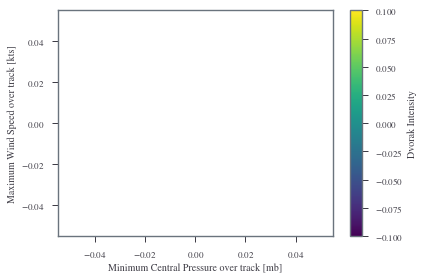

In [23]:
plt.scatter(
    np.nanmin(gtcs.cma_pres.values, axis=1),
    np.nanmax(gtcs.cma_wind.values, axis=1),
    c=np.nanmax(gtcs.cma_cat.values, axis=1),
)
plt.colorbar(label="Dvorak Intensity")
plt.ylabel("Maximum Wind Speed over track [kts]")
plt.xlabel("Minimum Central Pressure over track [mb]")

In [24]:
from src.data_loading.ibtracs import no_tcs

In [25]:
ntcs = no_tcs()

In [26]:
ntcs

<xarray.Dataset>
Dimensions:           (storm: 284, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'GM' b'GM' b'GM' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [27]:
from src.plot.ibtracs import plot_multiple_storms
import matplotlib.pyplot as plt
from src.constants import NO_BBOX

'plot_multiple_storms'  2.59499 s 



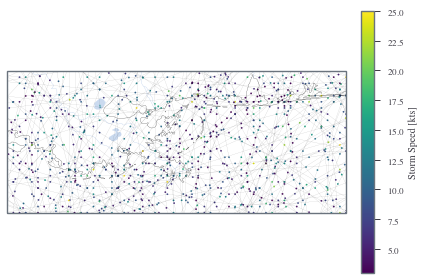

In [28]:
plot_multiple_storms(ntcs, scatter_size=9, bbox=NO_BBOX)

'plot_multiple_storms'  2.56453 s 



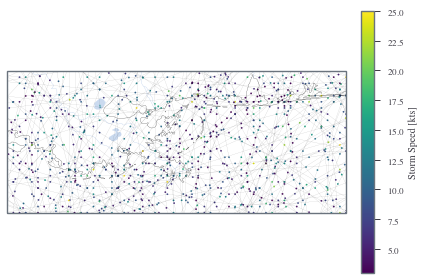

In [29]:
plot_multiple_storms(ntcs, scatter_size=9, bbox=NO_BBOX)

In [30]:
np.unique(ntcs.name.values)

array([b'ABBY', b'ALBERTO', b'ALICIA', b'ALLISON', b'ANDREA', b'ANDREW',
       b'ARLENE', b'AUDREY', b'BAKER', b'BARBARA', b'BARRY', b'BECKY',
       b'BERTHA', b'BERYL', b'BETA', b'BETSY', b'BILL', b'BONNIE',
       b'BRENDA', b'CAMILLE', b'CANDY', b'CARLA', b'CELIA', b'CHANTAL',
       b'CINDY', b'CLAUDETTE', b'COLIN', b'CRISTOBAL', b'DANNY', b'DEAN',
       b'DEBBIE', b'DEBBY', b'DEBRA', b'DELTA', b'DENNIS', b'DOLLY',
       b'EARL', b'EASY', b'EDOUARD', b'ELENA', b'ERIN', b'ESTHER', b'ETA',
       b'ETHEL', b'FAY', b'FELICE', b'FLORENCE', b'FLOSSY', b'GEORGES',
       b'GERDA', b'GILBERT', b'GORDON', b'GUSTAV', b'HANNA', b'HARVEY',
       b'HELENE', b'HENRI', b'HERMINE', b'HILDA', b'HOW', b'HUMBERTO',
       b'IDA', b'IKE', b'IRENE', b'IRMA', b'ISAAC', b'ISIDORE', b'IVAN',
       b'JOSEPHINE', b'JUAN', b'KATE', b'KATRINA', b'KEITH', b'LAURA',
       b'LEE', b'LILI', b'LOVE', b'MATTHEW', b'MICHAEL', b'MINDY',
       b'MITCH', b'NATE', b'NICHOLAS', b'NOT_NAMED', b'OPAL', b'RITA',
  

In [31]:
from src.data_loading.ibtracs import katrina

katrina()

<xarray.Dataset>
Dimensions:           (storm: 1, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [32]:
ntcs["name"].shape

(284,)

In [33]:
len(ntcs["name"].values.shape)

1

In [34]:
[
    "storm_dir",
    "storm_speed",
    "nature",
    "usa_seahgt",
    "usa_searad",
    "usa_r34",
    "usa_r50",
    "usa_r64",
    "dist2d",
    "landfall",
]

['storm_dir',
 'storm_speed',
 'nature',
 'usa_seahgt',
 'usa_searad',
 'usa_r34',
 'usa_r50',
 'usa_r64',
 'dist2d',
 'landfall']

In [35]:
for var in ntcs:
    if "usa" in var:
        print(var)

source_usa
usa_agency
usa_atcf_id
usa_lat
usa_lon
usa_record
usa_status
usa_wind
usa_pres
usa_sshs
usa_r34
usa_r50
usa_r64
usa_poci
usa_roci
usa_rmw
usa_eye
usa_gust
usa_seahgt
usa_searad
